## GRAPPA g factor map 
###### Author: Zimu Huo
###### Date: 06.2022


This has the same sampling scheme as SENSE, so it is a more generalised version. Thus, the slice data and reference data are separated. 

-------------------------------------------------------------------------
References
    
    [1] 
    Author: Mark A. Griswold et al. 
    Title: General Formulation for Quantitative G-factorCalculation in GRAPPA Reconstructions
    Link: https://onlinelibrary.wiley.com/doi/epdf/10.1002/mrm.22066
    

In [1]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
import util.mask as undersample
from util.fft import *
import util.simulator as simulate
import util.phantom as phantom
from util.gfactor import *
from tqdm.notebook import tqdm
from util.zpad import *
from scipy import io
from util.twix import * 

In [2]:
data = np.load("../lib/slice1_grappa1.npy")
rawImage = ifft2c(data)
ny, nx, numCoil= rawImage.shape

In [3]:
recon = gfactor_grappa(data, ny, nx, 8)

In [4]:
mask = np.zeros(data.shape)
mask[::8] = 1

In [5]:
data = data * mask

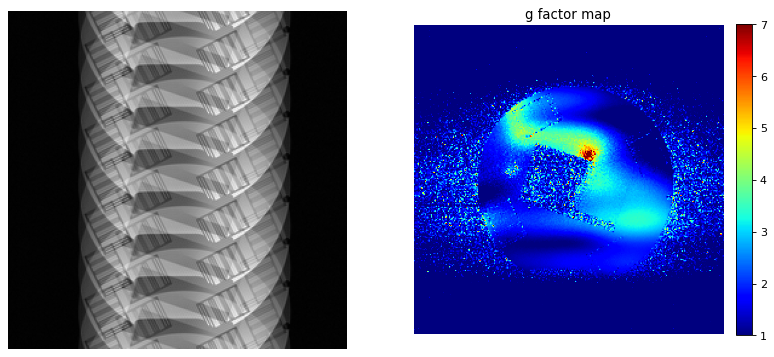

In [7]:
plt.figure(figsize=(12, 8), dpi=80)
plt.subplot(121)
plt.axis('off')
plt.imshow(np.abs(rsos(ifft2c(data))),cmap='gray')
plt.subplot(122)
plt.axis('off')
tf = plt.imshow(np.abs(recon),cmap='jet')
plt.title("g factor map")
plt.colorbar(tf, fraction=0.046, pad=0.04)
plt.clim(1, 7)
plt.savefig("grappa_g_factor.png")
plt.show()